# Collisions Data by SDOT

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
import pandas_profiling as pp
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 500)
df=pd.read_csv('C://Users/S13141/Downloads/dataCollisions.csv')
df.head()

C:\Users\S13141\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO  \
0             2 -122.323148  47.703140         1    1307       1307  3502005   
1             1 -122.347294  47.647172         2   52200      52200  2607959   
2             1 -122.334540  47.607871         3   26700      26700  1482393   
3             1 -122.334803  47.604803         4    1144       1144  3503937   
4             2 -122.306426  47.545739         5   17700      17700  1807429   

    STATUS      ADDRTYPE   INTKEY  \
0  Matched  Intersection  37475.0   
1  Matched         Block      NaN   
2  Matched         Block      NaN   
3  Matched         Block      NaN   
4  Matched  Intersection  34387.0   

                                      LOCATION EXCEPTRSNCODE EXCEPTRSNDESC  \
0                   5TH AVE NE AND NE 103RD ST                         NaN   
1   AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N           NaN           NaN   
2  4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST           NaN           NaN   
3     2ND AVE BETWEEN MARION ST AND MADISON ST                         NaN   
4              SWIFT AVE S AND SWIFT AV OFF RP           NaN           NaN   

   SEVERITYCODE.1                    SEVERITYDESC COLLISIONTYPE  PERSONCOUNT  \
0               2                Injury Collision        Angles            2   
1               1  Property Damage Only Collision     Sideswipe            2   
2               1  Property Damage Only Collision    Parked Car            4   
3               1  Property Damage Only Collision         Other            3   
4               2                Injury Collision        Angles            2   

   PEDCOUNT  PEDCYLCOUNT  VEHCOUNT                 INCDATE  \
0         0            0         2  2013/03/27 00:00:00+00   
1         0            0         2  2006/12/20 00:00:00+00   
2         0            0         3  2004/11/18 00:00:00+00   
3         0            0         3  2013/03/29 00:00:00+00   
4         0            0         2  2004/01/28 00:00:00+00   

                  INCDTTM                             JUNCTIONTYPE  \
0    3/27/2013 2:54:00 PM   At Intersection (intersection related)   
1   12/20/2006 6:55:00 PM  Mid-Block (not related to intersection)   
2  11/18/2004 10:20:00 AM  Mid-Block (not related to intersection)   
3    3/29/2013 9:26:00 AM  Mid-Block (not related to intersection)   
4    1/28/2004 8:04:00 AM   At Intersection (intersection related)   

   SDOT_COLCODE                                       SDOT_COLDESC  \
0            11  MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...   
1            16  MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...   
2            14       MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END   
3            11  MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...   
4            11  MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...   

  INATTENTIONIND UNDERINFL   WEATHER ROADCOND                LIGHTCOND  \
0            NaN         N  Overcast      Wet                 Daylight   
1            NaN         0   Raining      Wet  Dark - Street Lights On   
2            NaN         0  Overcast      Dry                 Daylight   
3            NaN         N     Clear      Dry                 Daylight   
4            NaN         0   Raining      Wet                 Daylight   

  PEDROWNOTGRNT  SDOTCOLNUM SPEEDING ST_COLCODE  \
0           NaN         NaN      NaN         10   
1           NaN   6354039.0      NaN         11   
2           NaN   4323031.0      NaN         32   
3           NaN         NaN      NaN         23   
4           NaN   4028032.0      NaN         10   

                                          ST_COLDESC  SEGLANEKEY  \
0                                  Entering at angle           0   
1  From same direction - both going straight - bo...           0   
2                             One parked--one moving           0   
3                   From same direction - all others           0   
4                                  Enterin

# EDA

count    194673.000000
mean          1.298901
std           0.457778
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: SEVERITYCODE, dtype: float64


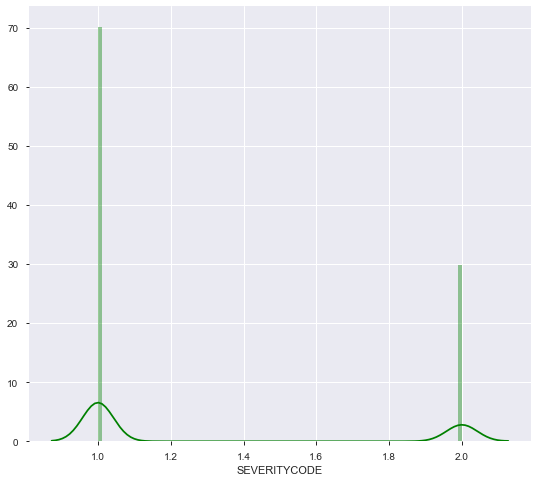

In [3]:
print(df['SEVERITYCODE'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SEVERITYCODE'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [4]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64')]

In [5]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY   INTKEY  \
0             2 -122.323148  47.703140         1    1307       1307  37475.0   
1             1 -122.347294  47.647172         2   52200      52200      NaN   
2             1 -122.334540  47.607871         3   26700      26700      NaN   
3             1 -122.334803  47.604803         4    1144       1144      NaN   
4             2 -122.306426  47.545739         5   17700      17700  34387.0   

   SEVERITYCODE.1  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  SDOT_COLCODE  \
0               2            2         0            0         2            11   
1               1            2         0            0         2            16   
2               1            4         0            0         3            14   
3               1            3         0            0         3            11   
4               2            2         0            0         2            11   

   SDOTCOLNUM  SEGLANEKEY  CROSSWALKKEY  
0         NaN           0             0  
1   6354039.0           0             0  
2   4323031.0           0             0  
3         NaN           0             0  
4   4028032.0           0             0

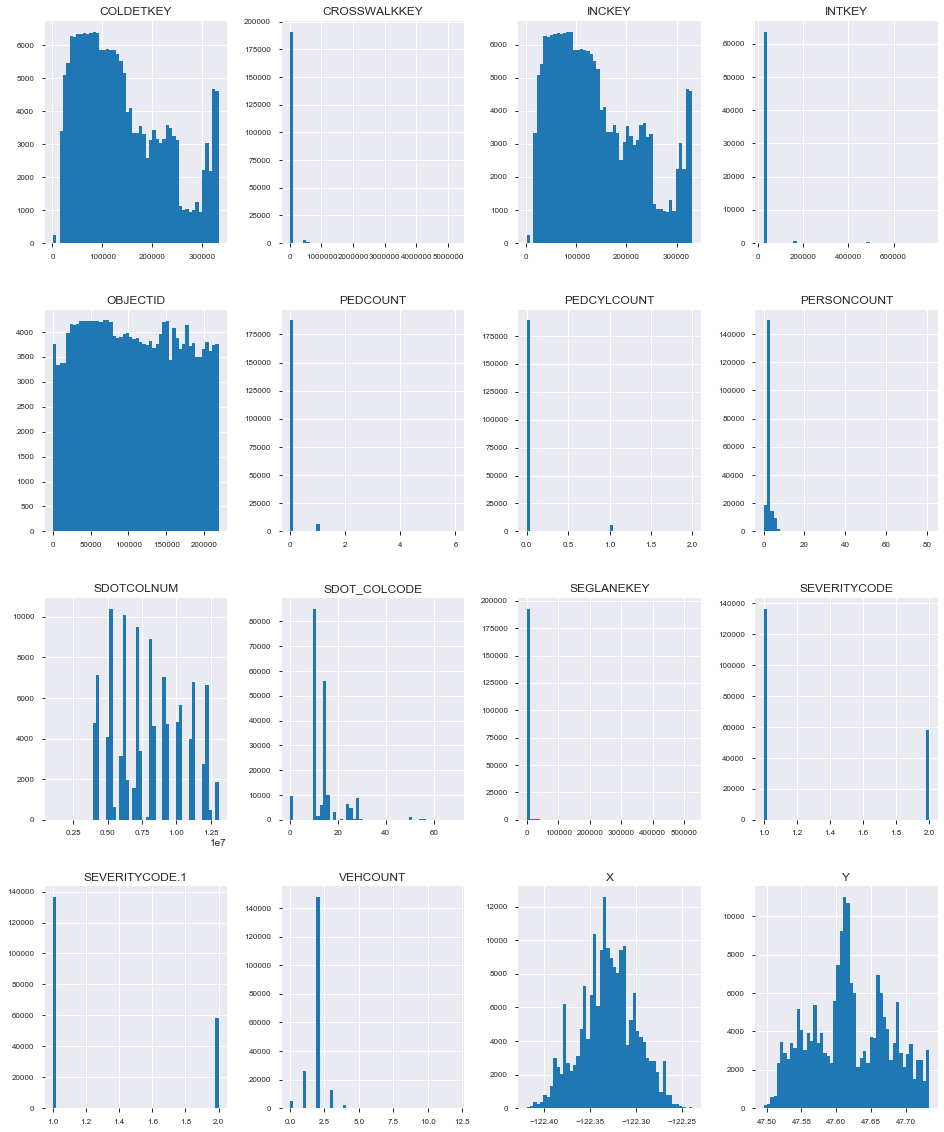

In [6]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

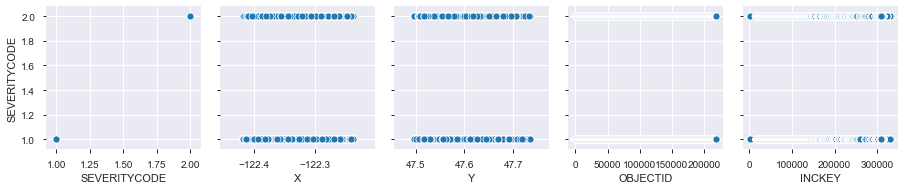

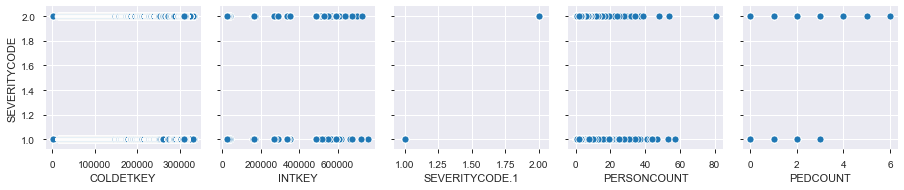

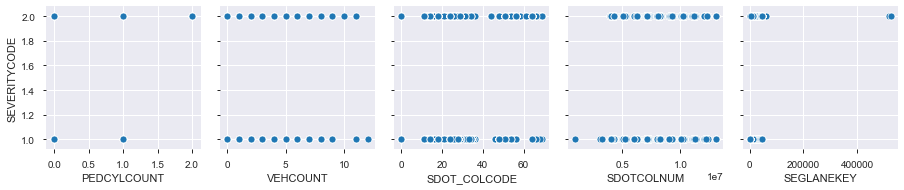

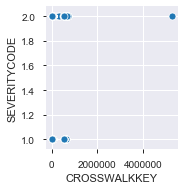

In [7]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SEVERITYCODE'])

In [8]:
pp.ProfileReport(df)

C:\Users\S13141\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_profiling\model\correlations.py:34: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr - 1.0), (rcorr - 1.0)))
C:\Users\S13141\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_profiling\model\correlations.py:124: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'The internally computed table of expected frequencies has a zero element at (0, 1).')
  correlation_name=correlation_name, error=error


In [9]:
print(df.dtypes)

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

KeyError: "['LATITUDE', 'LONGITUDE'] not in index"